In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# 2-layer NN

## Initialization

We'll be making 2-layer NN: input and output layer, no hidden layer. Simple thing to startu but good to gain general understanding.

First let's mark our input layer.

In [2]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1] ])

Now let's mark our output layer

In [3]:
y = np.array([[0,0,1,1]]).T
y

array([[0],
       [0],
       [1],
       [1]])

Goal is to correctly guess values in output layer based on input layer values. To do that we need to transfer input layer values through synapses to output layer. this where transformation takes place by using activation function which uses weights from synapses. First let's set those weights randomly.

In [4]:
#set seed
np.random.seed(1)
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1
syn0

array([[-0.16595599],
       [ 0.44064899],
       [-0.99977125]])

## Forward pass

Now we can start passing input values to output layer. We will be using sigmoid activation function because of it's simplicity (there are more of activation functions). Activation function is just a function which takes all the input to the node and transforms it into output (it could be very simple, for example: if input sum > 2: return 1, else: 0). 

As mentioned we'll be using sigmoid function, which has following form:

\begin{align}
sigmoid = \frac {1}{1+e ^{-net_i}}
\end{align}

In python it has following form:

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

To calculate net (net refers to net input to layer), we could use following formula:

\begin{align}
net_i =  \sum {weight_i}*{input_i}
\end{align}

Formula refers that we should multiply input with weight of synapses and do so with all the synapses that reach to specific node

In python we could calculate net input to output layer as following (just dot product)

In [6]:
np.dot(X,syn0)

array([[-0.99977125],
       [-0.55912226],
       [-1.16572724],
       [-0.72507825]])

and so we could pass it through sigmoid function

In [7]:
sigmoid(np.dot(X,syn0))

array([[0.2689864 ],
       [0.36375058],
       [0.23762817],
       [0.3262757 ]])

More about sigmoid function. We could see how output changes when we change values of input in the following plot.

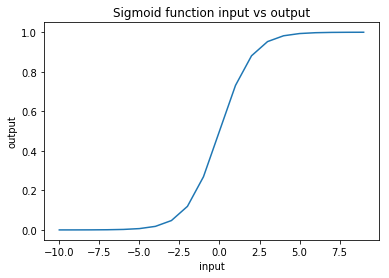

In [8]:
df_sigmoid=pd.DataFrame.from_dict({'x':[x for x in range(-10,10)]})
df_sigmoid=df_sigmoid.set_index(df_sigmoid.x)
df_sigmoid['sig']=sigmoid(df_sigmoid.x)
plt_sig=df_sigmoid.sig.plot(title='Sigmoid function input vs output')
plt_sig.set_xlabel('input')
plt_sig.set_ylabel('output')

As we can see from the plot sigmoid function output is between 0 and 1 (nicely normalizes data). Also we see from the plot that output has most steepest growth between -2.5 and 2.5.

## Error

Now as we have very  simple NN we have reached NN output. To assess how good our model is we have to calculate error.

\begin{align}
error_i = target_i-output_i
\end{align}

In [9]:
output=sigmoid(np.dot(X,syn0))
error=y-output
error

array([[-0.2689864 ],
       [-0.36375058],
       [ 0.76237183],
       [ 0.6737243 ]])

Total error can be calulated by this

\begin{align}
error= \sum \frac 12 (target_i-output_i)^2
\end{align}

## Backpropagation

Now we need to reduce error. To do that we need to change the weights. But how much? We could do it as a guess (change weights in some way an observe if error is reducing). But of course it is not very efficient (especially with large NNs). This is a part where (partial) derivative comes in hand. If we take derivative of output layer, we'll get to know the slope of each point. 

What we need is to calculate following:

\begin{align}
\frac {\partial error}{\partial w_i}
\end{align}

It states we need to find each weights share in total error. Previous formula could be calculated like this

\begin{align}
\frac {\partial error}{\partial w_i} = \frac {\partial error} {\partial output_i} * \frac {\partial output_i} {\partial net_i} * \frac {\partial net_i} {\partial w_i}
\end{align}

Let's find each component. First partial derivative of error 

\begin{align}
\frac {\partial error} {\partial output_i} = target_i -output_i
\end{align}

Then second component:

\begin{align}
\frac {\partial out_i} {\partial net_i} = output_i * (1-output_i)
\end{align}

this is derivative of sigmoid function which is not covered in this page, google it and find out how it is found.

And now third component:

\begin{align}
\frac {\partial net_i} {\partial w_i} = input_i
\end{align}

Plug it all back in:

\begin{align}
\frac {\partial error}{\partial w_i} =  (target_i-output_i) * output_i*(1-output_i) * input_i
\end{align}

What we'll calculate:
 - size of the error (target if i - output of i)
 - input (input of i)
 - derivative sigmoid function. If slope is steep (see plot about sigmoid derivative), we want to adjust weights more because we are not very sure, but if we are more confident (for larger numbers sigmoid function has shallow gradient). Derivative achieves that.

In python this look like this:

In [10]:
#derivative of sigmoid function
def sigmoid_der(x):
    return x*(1-x)

output_error = y - output

# multiply how much we missed by the 
# slope of the sigmoid at the values in l1
output_delta = output_error * sigmoid_der(l1)

NameError: name 'l1' is not defined

Now we can update weights

In [11]:
syn0 += np.dot(l0.T,output_delta)

NameError: name 'l0' is not defined

In real life above steps are repeated many-many times to reduce error (NN learns a bit in ever iteration)

## Compact code

Code to use as a class to implement 2-layer NN

In [12]:
class NeuralNetwork():
    def __init__(self):
        # Seed to repeat results
        np.random.seed(1)
        #assign synaptic weights randomly with mean of 0
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network (a single neuron).
            output = self.think(training_set_inputs)

            # Calculate the error (The difference between the desired output
            # and the predicted output).
            error = training_set_outputs - output
            
            #print error
            if (iteration% 10000) == 0:
                print("Error:" + str(np.mean(np.abs(error))))

            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero, do not cause changes to the weights.
            adjustment = np.dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

            # Adjust the weights.
            self.synaptic_weights += adjustment

    # The neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(np.dot(inputs, self.synaptic_weights))

In [13]:
#Intialise a single neuron neural network.
neural_network = NeuralNetwork()

# The training set. We have 4 examples, each consisting of 3 input values
# and 1 output value.
training_set_inputs = np.array([  [0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1] ])
training_set_outputs =  np.array([[0,0,1,1]]).T

# Train the neural network using a training set.
# Do it 60,000 times and make small adjustments each time.
neural_network.train(training_set_inputs, training_set_outputs, 60000)

Error:0.5172082754380926
Error:0.007954845066726928
Error:0.005597823963397232
Error:0.004560869180125656
Error:0.0039448224333886225
Error:0.0035253088374209004


In [26]:
neural_network.think(training_set_inputs)

array([[0.00390231],
       [0.00318165],
       [0.99740399],
       [0.99681556]])

In [14]:
x=np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1] ])

In [15]:
y=np.array([[0,0,1,1]]).T

In [16]:
syn0=2*np.random.random((3,1))-1

In [17]:
syn0

array([[-0.39533485],
       [-0.70648822],
       [-0.81532281]])

In [25]:
#pass
l0=X
l1=sigmoid(np.dot(l0, syn0))
l1

array([[0.33777615],
       [0.21271463],
       [0.3026181 ],
       [0.18689996]])

In [19]:
error=y-l1

In [20]:
l1_delta=error*(sigmoid_der(l1))

In [21]:
syn0+=np.dot(l0.T, l1_delta)

In [22]:
l0

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [23]:
l1_delta

array([[-0.0652342 ],
       [-0.02635674],
       [ 0.13626764],
       [ 0.09742588]])

In [24]:
syn0

array([[-0.16164133],
       [-0.63541908],
       [-0.67322023]])